In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn

from pathlib import Path
from datetime import date, datetime, timedelta
from IPython.display import Markdown, display
from data_process_gates import GATES_DIR, read_all_df, DataTransform

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

sklearn.show_versions()


System:
    python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
executable: D:\Anaconda\python.exe
   machine: Windows-10-10.0.14393-SP0

Python dependencies:
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.0
        numpy: 1.23.5
        scipy: 1.10.1
       Cython: 0.29.23
       pandas: 1.5.2
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


## Импорт данных для разведочного анализа

In [2]:
df = pd.read_csv('train.csv', parse_dates=['ts'], index_col=0)
test_df = pd.read_csv('test.csv', parse_dates=['ts'], index_col=0)

In [3]:
# добавление новых признаков
df['date'] = df['ts'].dt.date
df['day'] = df['ts'].dt.day
df['hour'] = df['ts'].dt.hour
df['minute'] = df['ts'].dt.minute
df['second'] = df['ts'].dt.second
df['month'] = df['ts'].dt.month
test_df['date'] = test_df['ts'].dt.date
test_df['day'] = test_df['ts'].dt.day
test_df['hour'] = test_df['ts'].dt.hour
test_df['minute'] = test_df['ts'].dt.minute
test_df['second'] = test_df['ts'].dt.second
test_df['month'] = test_df['ts'].dt.month
df

,user_id,ts,gate_id,date,day,hour,minute,second,month
0,18,2022-07-29 09:08:54,7,2022-07-29,29,9,8,54,7
1,18,2022-07-29 09:09:54,9,2022-07-29,29,9,9,54,7
2,18,2022-07-29 09:09:54,9,2022-07-29,29,9,9,54,7
3,18,2022-07-29 09:10:06,5,2022-07-29,29,9,10,6,7
4,18,2022-07-29 09:10:08,5,2022-07-29,29,9,10,8,7
...,...,...,...,...,...,...,...,...,...
37513,6,2022-12-31 20:38:56,11,2022-12-31,31,20,38,56,12
37514,6,2022-12-31 20:39:22,6,2022-12-31,31,20,39,22,12
37515,6,2022-12-31 20:39:23,6,2022-12-31,31,20,39,23,12
37516,6,2022-12-31 20:39:31,9,2022-12-31,31,20,39,31,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37518 entries, 0 to 37517
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  37518 non-null  int64         
 1   ts       37518 non-null  datetime64[ns]
 2   gate_id  37518 non-null  int64         
 3   date     37518 non-null  object        
 4   day      37518 non-null  int64         
 5   hour     37518 non-null  int64         
 6   minute   37518 non-null  int64         
 7   second   37518 non-null  int64         
 8   month    37518 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.9+ MB


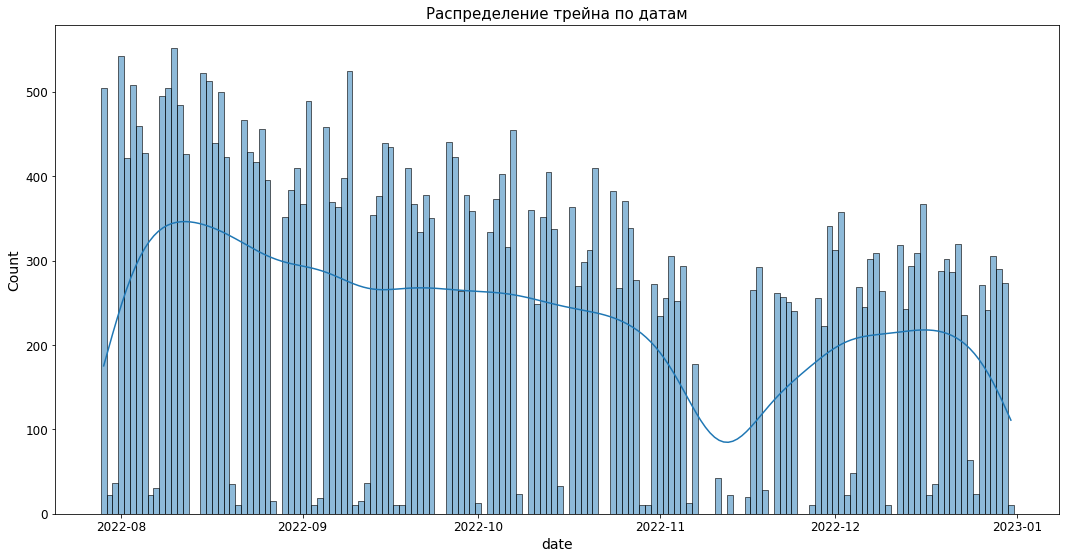

In [5]:
plt.figure(figsize=(18,9))
sns.histplot(data=df['date'], kde=True, bins=df['date'].nunique())
plt.title("Распределение трейна по датам")
plt.show()

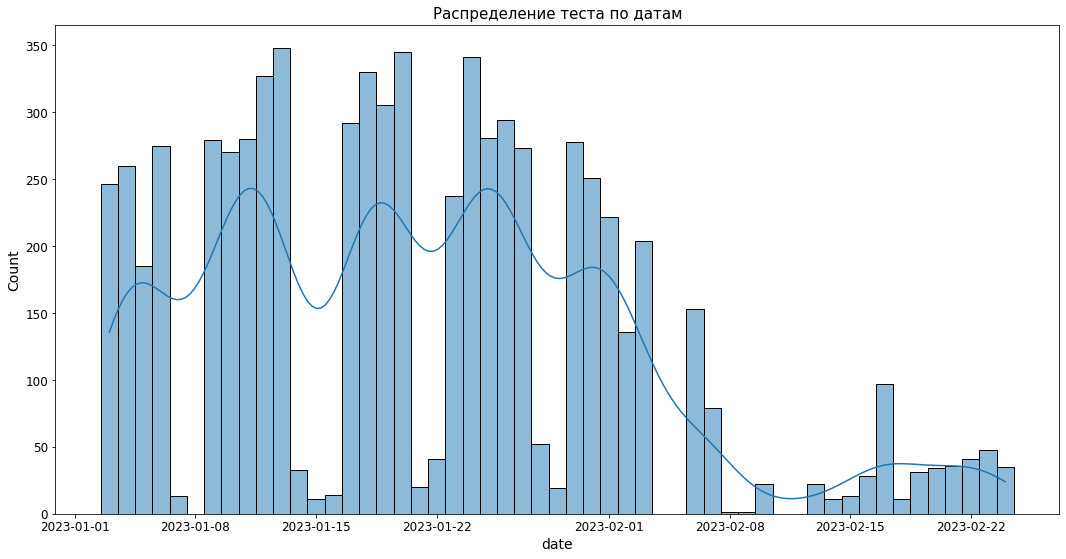

In [6]:
plt.figure(figsize=(18,9))
sns.histplot(data=test_df['date'], kde=True, bins=test_df['date'].nunique())
plt.title("Распределение теста по датам")
plt.show()

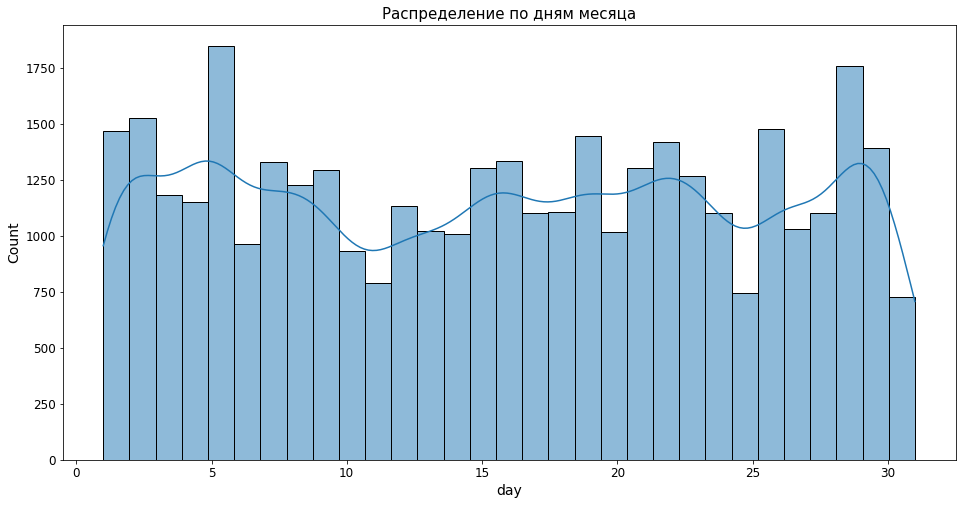

In [7]:
plt.figure(figsize=(16,8))
sns.histplot(data=df['day'], kde=True, bins=31)
plt.title("Распределение по дням месяца")
plt.show()

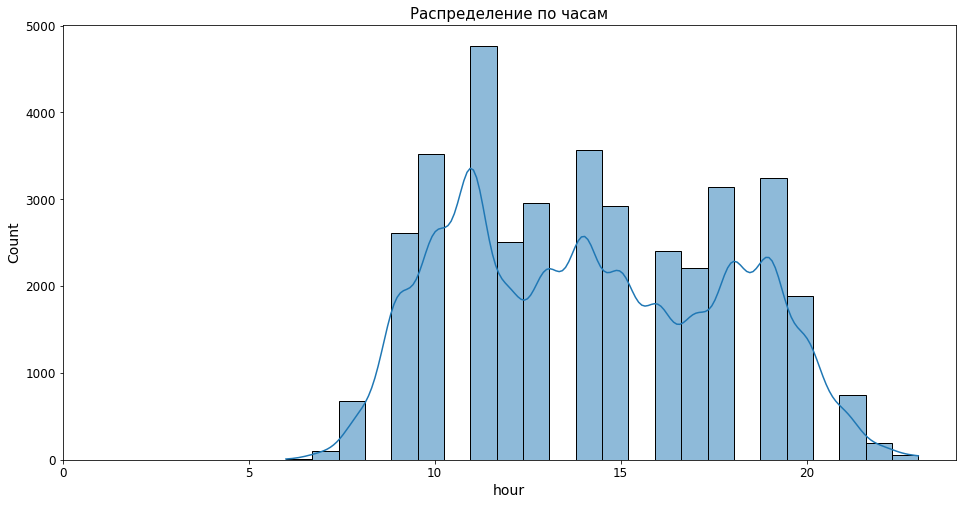

In [8]:
plt.figure(figsize=(16,8))
g = sns.histplot(data=df['hour'], kde=True, bins=24)
g = g.set(xlim=(0,24))
plt.title("Распределение по часам")
plt.show(g)

In [9]:
test_df

,ts,gate_id,user_word,date,day,hour,minute,month
37518,2023-01-03 08:21:00,9,gini,2023-01-03,3,8,21,1
37519,2023-01-03 08:21:00,9,gini,2023-01-03,3,8,21,1
37520,2023-01-03 08:21:18,5,gini,2023-01-03,3,8,21,1
37521,2023-01-03 08:21:19,5,gini,2023-01-03,3,8,21,1
37522,2023-01-03 08:21:39,10,gini,2023-01-03,3,8,21,1
...,...,...,...,...,...,...,...,...
44638,2023-02-24 19:43:36,11,collinear,2023-02-24,24,19,43,2
44639,2023-02-24 19:44:00,4,collinear,2023-02-24,24,19,44,2
44640,2023-02-24 19:44:01,4,collinear,2023-02-24,24,19,44,2
44641,2023-02-24 19:44:09,9,collinear,2023-02-24,24,19,44,2


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 37518 to 44642
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         7125 non-null   datetime64[ns]
 1   gate_id    7125 non-null   int64         
 2   user_word  7125 non-null   object        
 3   date       7125 non-null   object        
 4   day        7125 non-null   int64         
 5   hour       7125 non-null   int64         
 6   minute     7125 non-null   int64         
 7   month      7125 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 501.0+ KB


In [11]:
# количество user_id и их метки

df.user_id.nunique(), df.sort_values('user_id').user_id.unique()

(56,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57], dtype=int64))

In [12]:
# распределение по user_id

df.user_id.value_counts()

37    2262
55    2238
6     2013
12    1953
19    1793
15    1756
18    1578
47    1341
53    1311
1     1299
33    1285
11    1281
49    1275
0     1250
39    1144
32    1076
54    1070
9     1034
50     994
29     990
3      989
48     743
14     696
17     677
27     603
35     601
46     502
57     497
24     416
42     359
26     316
34     284
23     261
25     247
40     242
31     191
56     137
41     124
43     124
20     115
22      96
28      64
45      57
7       49
36      48
2       39
8       29
10      17
38      13
5       10
30      10
52       5
21       5
44       4
51       3
4        2
Name: user_id, dtype: int64

## Посмотрим на количество посещений пользователей

In [13]:
grp_user = df.groupby('user_id').agg(
    counts=('ts', 'count'),
    date_unique=('date', lambda x: x.nunique()),
    date_min=('date', 'min'),
    date_max=('date', 'max'),
)
grp_user.sort_values(['counts', 'date_min']).head(7)

,counts,date_unique,date_min,date_max
user_id,,,,
4,2,1,2022-08-09,2022-08-09
51,3,2,2022-12-13,2022-12-16
44,4,1,2022-12-28,2022-12-28
52,5,1,2022-08-10,2022-08-10
21,5,2,2022-12-16,2022-12-28
5,10,2,2022-10-26,2022-11-30
30,10,2,2022-12-16,2022-12-27


## Редких пользователей user_id	4, 51, 52 возможно убрать из трейна ?

## Какие турникеты используются в трейне и тесте:

In [14]:
sorted(df.gate_id.unique())

[-1, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [15]:
sorted(test_df.gate_id.unique())

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
# турникеты, которых нет в тесте
set(df.gate_id.unique()) - set(test_df.gate_id.unique())

{0, 16}

## Возможно эти турникеты следует убрать из обучающей выборки?

In [17]:
# кто и когда ходил через эти турникеты 
df[df.gate_id.isin([0, 16])]

,user_id,ts,gate_id,date,day,hour,minute,second,month
12652,25,2022-09-06 11:16:28,0,2022-09-06,6,11,16,28,9
12653,25,2022-09-06 11:16:36,0,2022-09-06,6,11,16,36,9
21309,25,2022-10-07 16:44:37,16,2022-10-07,7,16,44,37,10
21310,25,2022-10-07 16:44:38,16,2022-10-07,7,16,44,38,10
36798,56,2022-12-28 14:49:51,16,2022-12-28,28,14,49,51,12
36799,21,2022-12-28 14:49:54,16,2022-12-28,28,14,49,54,12


In [18]:
df.groupby('gate_id', as_index=False).user_id.count().rename(columns={'user_id': 'count'}).head(20)

,gate_id,count
0,-1,48
1,0,2
2,1,5
3,3,5351
4,4,8170
5,5,4619
6,6,1800
7,7,3026
8,8,48
9,9,3390


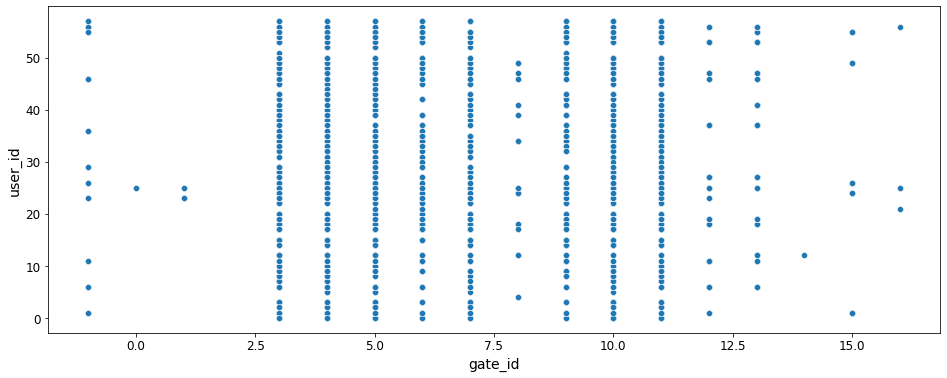

In [19]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x='gate_id', y='user_id')
plt.show()

In [20]:
grp_date = df.groupby(['date', 'user_id', 'gate_id'], as_index=False).ts.count().rename(columns={'ts': 'count'})
grp_date

,date,user_id,gate_id,count
0,2022-07-29,0,3,4
1,2022-07-29,0,4,2
2,2022-07-29,0,6,2
3,2022-07-29,0,7,1
4,2022-07-29,0,10,1
...,...,...,...,...
14848,2022-12-31,6,6,2
14849,2022-12-31,6,7,1
14850,2022-12-31,6,9,4
14851,2022-12-31,6,10,1


In [21]:
df.ts.min(), df.ts.max()

(Timestamp('2022-07-29 09:08:54'), Timestamp('2022-12-31 20:39:31'))

In [22]:
grp_month = df.groupby(['month'], as_index=False).agg(
    counts=('ts', 'count'),
    user_id_unique=('user_id', lambda x: x.nunique()),
    date_unique=('date', lambda x: x.nunique())
)
grp_month['fraction'] = grp_month['counts'] / grp_month['counts'].sum()
grp_month

,month,counts,user_id_unique,date_unique,fraction
0,7,563,23,3,0.015006
1,8,10639,42,28,0.283571
2,9,8394,39,28,0.223733
3,10,7238,40,26,0.192921
4,11,4042,42,21,0.107735
5,12,6642,42,30,0.177035


In [23]:
test_df.ts.min(), test_df.ts.max()

(Timestamp('2023-01-03 08:21:00'), Timestamp('2023-02-24 19:44:09'))

In [24]:
grp_month2 = test_df.groupby(['month'], as_index=False).agg(
    counts=('ts', 'count'),
    user_id_unique=('user_word', lambda x: x.nunique()),
    date_unique=('date', lambda x: x.nunique())
)
grp_month2['fraction'] = grp_month2['counts'] / grp_month2['counts'].sum()
grp_month2

,month,counts,user_id_unique,date_unique,fraction
0,1,5900,34,28,0.82807
1,2,1225,25,20,0.17193


In [25]:
df.groupby(['user_id', 'day'], as_index=False).date.count().rename(columns={'date': 'count'})

,user_id,day,count
0,0,1,52
1,0,2,42
2,0,3,43
3,0,4,39
4,0,5,72
...,...,...,...
1118,57,27,7
1119,57,28,6
1120,57,29,21
1121,57,30,27


In [26]:
df.date.nunique() # уникальных дат

136

In [27]:
# посмотрим сколько дней приходили пользователи

df_date = df[['user_id', 'date']].drop_duplicates()
grp = df_date.groupby(['user_id'], as_index=False).date.count().rename(columns={'date': 'count'})
grp.sort_values(['count', 'user_id'])

,user_id,count
4,4,1
42,44,1
50,52,1
5,5,2
8,8,2
10,10,2
19,21,2
28,30,2
36,38,2
49,51,2


In [28]:
grp.sort_values('user_id')

,user_id,count
0,0,97
1,1,98
2,2,3
3,3,93
4,4,1
5,5,2
6,6,95
7,7,8
8,8,2
9,9,60


### Перечитаем данные после обработки классом

In [29]:
file_dir = Path().cwd()
file_train = file_dir.joinpath('train.csv')
file_test = file_dir.joinpath('test.csv')
train_df = pd.read_csv(file_train, parse_dates=['ts'], index_col=0)
test_df = pd.read_csv(file_test, parse_dates=['ts'], index_col=0)
test_df.insert(0, 'user_id', -1)

all_df = read_all_df(file_dir)

data_cls = DataTransform(category_columns=[])
all_df = data_cls.initial_preparation(all_df)
all_df.columns

Index(['user_id', 'ts', 'gate_id', 'user_word', 'date', 'time', 'day', 'week',
       'month', 'hour', 'min', 'sec', 'minutes', 'seconds', '1day', '2day',
       'last_day-1', 'last_day', 'weekday', 'is_weekend', 'DofY1', 'DofY2',
       'no_december', 'beep_count', 'beep_gate'],
      dtype='object')

In [30]:
test_df.groupby('gate_id', as_index=False).user_id.count().rename(columns={'user_id': 'count'}).head(20)

,gate_id,count
0,-1,2
1,1,2
2,2,4
3,3,909
4,4,1459
5,5,860
6,6,294
7,7,540
8,8,18
9,9,780


In [31]:
# посмотрим на редко приходящих пользователей

train_df[train_df.user_id.isin([4, 51, 44, 21, 52])].sort_values(['user_id', 'ts'])

,user_id,ts,gate_id
3504,4,2022-08-09 10:09:08,8
3505,4,2022-08-09 10:09:08,8
34334,21,2022-12-16 14:03:08,5
34335,21,2022-12-16 14:03:10,5
34336,21,2022-12-16 14:03:12,6
34337,21,2022-12-16 14:03:13,6
36799,21,2022-12-28 14:49:54,16
36779,44,2022-12-28 14:22:19,5
36780,44,2022-12-28 14:22:21,5
36783,44,2022-12-28 14:22:37,4


#### Возможно нужно убрать эти user_id, т.к. они случайно зашли

In [32]:
# посмотрим на все записи, которые будем считать выбросами

outlet_user_gate = train_df.user_id.isin([4, 51, 44, 21, 52]) | train_df.gate_id.isin([0,16]) 

train_df[outlet_user_gate]

,user_id,ts,gate_id
3504,4,2022-08-09 10:09:08,8
3505,4,2022-08-09 10:09:08,8
4059,52,2022-08-10 10:58:42,7
4062,52,2022-08-10 11:00:47,5
4063,52,2022-08-10 11:00:48,5
4159,52,2022-08-10 13:33:05,4
4160,52,2022-08-10 13:33:07,4
12652,25,2022-09-06 11:16:28,0
12653,25,2022-09-06 11:16:36,0
21309,25,2022-10-07 16:44:37,16


## Посмотрим на распределение посещений по рабочим/выходным дням

In [33]:
flt_cols = ['date', 'weekday', 'beep_count', 'is_weekend']
tmp = all_df[flt_cols].drop_duplicates()
tmp["weekend"] = tmp["weekday"].map(lambda x: 1 if x in (5, 6) else 0)
tmp['cmp_weekends'] = tmp["weekend"] == tmp["is_weekend"]
grp_date = all_df.groupby(['date'], as_index=False).agg(date_cnt=('ts', 'count'))

In [34]:
tmp[tmp["weekend"] == 1].beep_count.describe()

count     40.000000
mean      29.400000
std       44.799153
min       11.000000
25%       11.000000
50%       21.000000
75%       31.500000
max      294.000000
Name: beep_count, dtype: float64

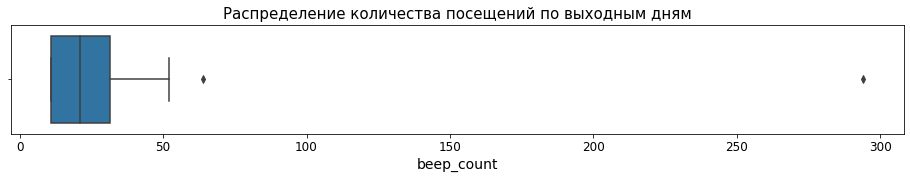

In [35]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.boxplot(x='beep_count', data=tmp[tmp["weekend"] == 1], ax=ax)
plt.title('Распределение количества посещений по выходным дням')
plt.show()

### Есть выбросы, нужно отметить эти выходные дни как рабочие

In [36]:
beep_counts = tmp[tmp["weekend"] == 1].beep_count
beep_counts.quantile(0.75) + beep_counts.std()*1.5, beep_counts.quantile(0.975)

(98.69872938359201, 69.74999999999967)

In [37]:
tmp[tmp["weekend"] == 0].beep_count.describe()

count    144.000000
mean     301.854167
std      132.062232
min        1.000000
25%      251.750000
50%      307.500000
75%      382.500000
max      552.000000
Name: beep_count, dtype: float64

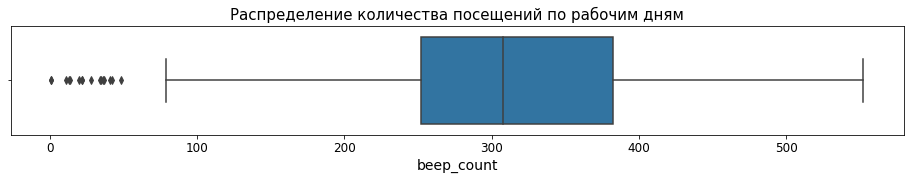

In [38]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.boxplot(x='beep_count', data=tmp[tmp["weekend"] == 0], ax=ax)
plt.title('Распределение количества посещений по рабочим дням')
plt.show()

### Есть выбросы в рабочих днях, нужно отмечать такие дни как выходные

In [39]:
beep_counts = tmp[tmp["weekend"] == 1].beep_count
beep_quantile = beep_counts.quantile(0.975)
beep_quantile_std = beep_counts.quantile(0.75) + beep_counts.std() * 1.5
print(beep_quantile, beep_quantile_std)

69.74999999999967 98.69872938359201


### Попробовать обе стратегии по разграничению дней: 
- порог 5%, т.е. 2.5% от максимального значения по выходным (или минимального значения по рабочим дням) = 69.7
- взять третий квантиль + полтора стандартных отклонения: как на графике с боксплотами = 98.7

### Исследование паттернов в турникетах

In [40]:
train_df.head()

,user_id,ts,gate_id
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5


In [41]:
from tqdm.notebook import tqdm


tmp = train_df
tmp["date"] = tmp["ts"].dt.date
current_user_id = current_date = prev_time = None
current_gate_times, current_gates = [], []
res_gate_times, result_gates = [], []

# Получение последовательности турникетов одного user_id в день
# смотрим только последовательности 3 и более подряд турникетов

for index, row in tqdm(tmp.iterrows(), total=len(tmp)):
    if current_user_id != row["user_id"] or current_date != row["date"]:
        if len(current_gate_times) >= 3:
            res_gate_times.append((current_user_id, current_gate_times))
            result_gates.append((current_user_id, current_gates))
        current_gate_times, current_gates = [], []
        current_user_id = row["user_id"]
        current_date = row["date"]
        prev_time = row["ts"]
    delta = int((row["ts"] - prev_time).total_seconds()) if prev_time else 0
    prev_time = row["ts"]
    current_gate_times.append((row["gate_id"], delta))
    current_gates.append(row["gate_id"])

if len(current_gate_times) >= 3:
    res_gate_times.append((current_user_id, current_gate_times))
    result_gates.append((current_user_id, current_gates))

  0%|          | 0/37518 [00:00<?, ?it/s]

In [42]:
result_gates[:5]

[(18, [7, 9, 9, 5, 5, 10, 11, 4, 4]),
 (18, [9, 9, 5, 5, 10]),
 (1, [9, 9, 5, 5, 10]),
 (3, [7, 9, 9, 5, 5, 10]),
 (6, [9, 9, 5, 5, 10])]

In [43]:
print(*res_gate_times[:5], sep='\n')

(18, [(7, 0), (9, 60), (9, 0), (5, 12), (5, 2), (10, 26), (11, 1333), (4, 25), (4, 1)])
(18, [(9, 0), (9, 0), (5, 18), (5, 1), (10, 22)])
(1, [(9, 0), (9, 0), (5, 14), (5, 1), (10, 27)])
(3, [(7, 0), (9, 129), (9, 0), (5, 12), (5, 2), (10, 26)])
(6, [(9, 0), (9, 0), (5, 10), (5, 2), (10, 20)])


In [44]:
train_df.user_id.nunique(), test_df.user_word.nunique()

(56, 34)

In [45]:
from data_process_gates import PREDICTIONS_DIR, read_all_df, DataTransform, DataTransform2

file_dir = Path().cwd()

all_df = read_all_df(file_dir)

train_df = all_df[all_df.user_id > -1]
test_df = all_df[all_df.user_id < 0]

In [46]:
all_df

,user_id,ts,gate_id,user_word
0,18,2022-07-29 09:08:54,7,NaN
1,18,2022-07-29 09:09:54,9,NaN
2,18,2022-07-29 09:09:54,9,NaN
3,18,2022-07-29 09:10:06,5,NaN
4,18,2022-07-29 09:10:08,5,NaN
...,...,...,...,...
44638,-1,2023-02-24 19:43:36,11,collinear
44639,-1,2023-02-24 19:44:00,4,collinear
44640,-1,2023-02-24 19:44:01,4,collinear
44641,-1,2023-02-24 19:44:09,9,collinear


In [47]:
data_cls = DataTransform()

df = data_cls.initial_preparation(all_df)

df.duplicated(['ts', 'gate_id', 'user_word']).sum()

2851

In [48]:
df.drop_duplicates(['ts', 'gate_id', 'user_word'], inplace=True)

In [49]:
grp_week = df.groupby(['week'], as_index=False).agg(
    counts=('ts', 'count'),
    user_id_unique=('user_word', lambda x: x.nunique())
)
grp_week['prs'] = grp_week['counts'] / grp_week['counts'].sum()
grp_week

,week,counts,user_id_unique,prs
0,1,924,27,0.022109
1,2,1452,26,0.034743
2,3,1271,29,0.030413
3,4,1398,29,0.033451
4,5,1003,24,0.024000
5,6,229,12,0.005480
6,7,178,14,0.004259
7,8,165,8,0.003948
8,30,527,23,0.012610
9,31,2258,34,0.054029


In [50]:
grp_week[grp_week.counts < 777].week.tolist()

[6, 7, 8, 30, 45, 46]

In [51]:
df = read_all_df(file_dir)

df["date"] = df['ts'].dt.date
df["time"] = df['ts'].dt.time
df["day"] = df['ts'].dt.day
df["week"] = df['ts'].dt.week
df["month"] = df['ts'].dt.month

df["hour"] = df['ts'].dt.hour
df["min"] = df['ts'].dt.minute
df["sec"] = df['ts'].dt.second

df['minutes'] = df["hour"] * 60 + df["min"]
df['seconds'] = df.minutes * 60 + df["sec"]

# 1-й день месяца
df["1day"] = df['ts'].dt.is_month_start.astype(int)
# 2-й день месяца
df["2day"] = (df.day == 2).astype(int)
# Предпоследний день месяца
df["last_day-1"] = (df.day == df.ts.dt.daysinmonth - 1).astype(int)
# Последний день месяца
df["last_day"] = df['ts'].dt.is_month_end.astype(int)

df["weekday"] = df['ts'].dt.dayofweek  # День недели от 0 до 6

# Метка выходного дня
df["is_weekend"] = df["weekday"].map(lambda x: 1 if x in (5, 6) else 0)

# Метки "график 2 через 2"
df["DofY1"] = (df['ts'].dt.dayofyear % 4).apply(lambda x: int(x in (1, 2)))
df["DofY2"] = (df['ts'].dt.dayofyear % 4).apply(lambda x: int(x < 2))

# удаление дубликатов
df.drop_duplicates(['ts', 'gate_id', 'user_word'], inplace=True)

# Подсчет количества срабатываний за день
df["beep_count"] = df.groupby("date").ts.transform("count")
# Подсчет количества срабатываний за день по каждому gate_id
df["beep_gate"] = df.groupby(["date", "gate_id"]).ts.transform("count")   

In [52]:
grp_week = df.groupby(['week'], as_index=False).agg(counts=('ts', 'count'))
out_weeks = grp_week[grp_week.counts < 777].week.tolist()
df = df[~df['week'].isin(out_weeks)]

In [53]:
# заполнение колонки user_word на трейне значением user_id
idx_isna_words = df['user_word'].isna()
df.loc[idx_isna_words, 'user_word'] = df.loc[idx_isna_words, 'user_id']

In [54]:
flt_cols = ['date', 'weekday', 'beep_count', 'is_weekend']
tmp = df[flt_cols].drop_duplicates()
tmp["weekend"] = tmp["weekday"].map(lambda x: 1 if x in (5, 6) else 0)
tmp['cmp_weekends'] = tmp["weekend"] == tmp["is_weekend"]
grp_date = df.groupby(['date'], as_index=False).agg(date_cnt=('ts', 'count'))
tmp[tmp["weekend"] == 1].beep_count.describe()

count     34.000000
mean      25.970588
std       45.037012
min        8.000000
25%        9.000000
50%       16.000000
75%       26.500000
max      272.000000
Name: beep_count, dtype: float64

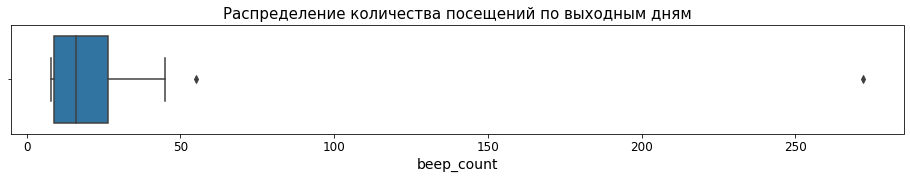

In [55]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.boxplot(x='beep_count', data=tmp[tmp["weekend"] == 1], ax=ax)
plt.title('Распределение количества посещений по выходным дням')
plt.show()

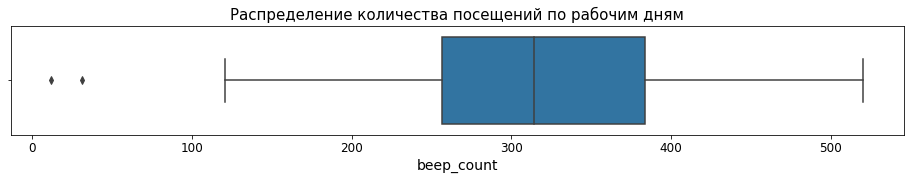

In [56]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.boxplot(x='beep_count', data=tmp[tmp["weekend"] == 0], ax=ax)
plt.title('Распределение количества посещений по рабочим дням')
plt.show()

In [57]:
beep_counts = tmp[tmp["weekend"] == 1].beep_count
beep_quantile = beep_counts.quantile(0.975)
beep_quantile_std = beep_counts.quantile(0.75) + beep_counts.std() * 1.5
print(beep_quantile, beep_quantile_std)

92.97499999999938 94.05551786976697


In [58]:
beep_counts = tmp[tmp["weekend"] == 0].beep_count
beep_quantile = beep_counts.quantile(0.025)
beep_quantile_std = beep_counts.quantile(0.25) - beep_counts.std() * 1.5
print(beep_quantile, beep_quantile_std)

173.85 121.537756845964


In [59]:
data_cls = DataTransform2()
grp = data_cls.fit_days_mask(all_df, show_messages=False)
grp

,user_id,date,time_start,time_end,time_delta,list_gates_full,total_visits,len_gates_full,len_gates_full_mean,len_gates_full_median,list_gates,train,first_show,last_show,no_december,cnt_use_gates,ratio_gate,week,month,1day,2day,last_day-1,last_day,weekday,is_weekend,DofY1,DofY2,user_word,user_diff_gates,1day_diff_gates,2day_diff_gates,last_day-1_diff_gates,last_day_diff_gates,weekday_diff_gates,is_weekend_diff_gates,DofY1_diff_gates,DofY2_diff_gates
0,0,2022-07-29,630,1126,496,"(3, 3, 11, 6, 6, 7, 3, 3, 10, 11, 4, 4)",97,12,12.206186,13.0,"(3, 3, 11, 6, 6, 7, 3, 3, 10, 11, 4, 4)",1,2022-07-29,2022-12-30,0,1,0.010309,30,7,0,0,0,0,4,0,1,0,0,68,67,67,65,65,18,68,44,37
1,0,2022-08-01,659,1120,461,"(7, 3, 3, 10, 6, 6, 3, 3, 11, 4, 4)",97,11,12.206186,13.0,"(7, 3, 3, 10, 6, 6, 3, 3, 11, 4, 4)",1,2022-07-29,2022-12-30,0,4,0.041237,31,8,1,0,0,0,0,0,1,1,0,68,4,67,65,65,19,68,44,41
2,0,2022-08-02,622,1093,471,"(7, 3, 3, 10, 11, 6, 5, 5, 10, 11, 4, 4)",97,12,12.206186,13.0,"(7, 3, 3, 10, 11, 6, 5, 5, 10, 11, 4, 4)",1,2022-07-29,2022-12-30,0,1,0.010309,31,8,0,1,0,0,1,0,1,0,0,68,67,4,65,65,15,68,44,37
3,0,2022-08-03,581,920,339,"(7, 9, 5, 5, 11, 4, 7, 3, 3, 10, 11, 4, 4)",97,13,12.206186,13.0,"(7, 9, 5, 5, 11, 4, 7, 3, 3, 10, 11, 4, 4)",1,2022-07-29,2022-12-30,0,1,0.010309,31,8,0,0,0,0,2,0,0,0,0,68,67,67,65,65,18,68,34,37
4,0,2022-08-04,557,1089,532,"(7, 5, 5, 11, 6, 6, 7, 3, 3, 10, 11, 4, 4)",97,13,12.206186,13.0,"(7, 5, 5, 11, 6, 6, 7, 3, 3, 10, 11, 4, 4)",1,2022-07-29,2022-12-30,0,1,0.010309,31,8,0,0,0,0,3,0,0,1,0,68,67,67,65,65,15,68,34,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,y,2023-01-30,771,1104,333,"(7, 3, 3, 10, 11, 4, 4, 9)",6,8,8.333333,8.5,"(7, 3, 3, 10, 11, 4, 4, 9)",0,2023-01-27,2023-02-18,0,42,7.000000,5,1,0,0,1,0,0,0,1,0,y,5,5,5,1,4,1,5,3,4
3055,y,2023-01-31,630,1082,452,"(3, 3, 10, 11, 4, 4, 9, 5, 5, 10, 11, 4, 4)",6,13,8.333333,8.5,"(3, 3, 10, 11, 4, 4, 9, 5, 5, 10, 11, 4, 4)",0,2023-01-27,2023-02-18,0,4,0.666667,5,1,0,0,0,1,1,0,0,0,y,5,5,5,4,1,1,5,3,4
3056,y,2023-02-01,765,1310,545,"(7, 9, 5, 5, 10, 11, 4, 4, 9)",6,9,8.333333,8.5,"(7, 9, 5, 5, 10, 11, 4, 4, 9)",0,2023-01-27,2023-02-18,0,103,17.166667,5,2,1,0,0,0,2,0,0,1,y,5,1,5,4,4,1,5,3,1
3057,y,2023-02-03,768,1050,282,"(7, 9, 5, 5, 10, 11, 4, 4)",6,8,8.333333,8.5,"(7, 9, 5, 5, 10, 11, 4, 4)",0,2023-01-27,2023-02-18,0,127,21.166667,5,2,0,0,0,0,4,0,1,0,y,5,5,5,4,4,2,5,3,4


In [60]:
mnt = grp[grp['date'] >= pd.to_datetime('2022-08-01').date()] \
    .groupby(['user_id', 'month'], as_index=False) \
    .agg(user_count=('user_id', 'count')) \
    .groupby('user_id', as_index=False) \
    .agg(user_mean=('user_count', 'mean'), user_median=('user_count', 'median'))
mnt

,user_id,user_mean,user_median
0,0,19.2,21.0
1,1,19.4,21.0
2,2,3.0,3.0
3,3,18.4,20.0
4,4,1.0,1.0
...,...,...,...
85,significant,10.0,10.0
86,target,8.0,8.0
87,tstat,11.0,11.0
88,x,9.0,9.0


In [61]:
grp[(pd.to_datetime(grp['first_show']).dt.date > pd.to_datetime('2022-12-01').date()) 
    & (pd.to_datetime(grp['date']).dt.date < pd.to_datetime('2023-01-01').date())].user_id

195      2
196      2
197      2
1035    21
1036    21
1293    30
1294    30
1853    44
2231    51
2232    51
Name: user_id, dtype: object

In [62]:
# список пользователей, которые не ходили в декабре
out_users = grp[grp.no_december == 1].user_id.unique()
out_users

array([4, 5, 7, 8, 20, 27, 28, 31, 38, 40, 42, 45, 52, 57], dtype=object)

In [63]:
all_df[all_df.user_id.isin(out_users)]

,user_id,ts,gate_id,user_word,date,time,day,week,month,hour,min,sec,minutes,seconds,1day,2day,last_day-1,last_day,weekday,is_weekend,DofY1,DofY2,no_december,beep_count,beep_gate
85,31,2022-07-29 10:41:50,3,31,2022-07-29,10:41:50,29,30,7,10,41,50,641,38510,0,0,0,0,4,0,1,0,1,505,84
86,31,2022-07-29 10:41:51,3,31,2022-07-29,10:41:51,29,30,7,10,41,51,641,38511,0,0,0,0,4,0,1,0,1,505,84
89,31,2022-07-29 10:42:12,10,31,2022-07-29,10:42:12,29,30,7,10,42,12,642,38532,0,0,0,0,4,0,1,0,1,505,54
122,20,2022-07-29 11:14:48,7,20,2022-07-29,11:14:48,29,30,7,11,14,48,674,40488,0,0,0,0,4,0,1,0,1,505,36
123,20,2022-07-29 11:15:43,3,20,2022-07-29,11:15:43,29,30,7,11,15,43,675,40543,0,0,0,0,4,0,1,0,1,505,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30601,5,2022-11-30 10:58:30,5,5,2022-11-30,10:58:30,30,48,11,10,58,30,658,39510,0,0,0,1,2,0,1,0,1,341,40
30602,5,2022-11-30 10:58:32,5,5,2022-11-30,10:58:32,30,48,11,10,58,32,658,39512,0,0,0,1,2,0,1,0,1,341,40
30605,5,2022-11-30 10:59:00,10,5,2022-11-30,10:59:00,30,48,11,10,59,0,659,39540,0,0,0,1,2,0,1,0,1,341,54
30698,5,2022-11-30 14:22:46,4,5,2022-11-30,14:22:46,30,48,11,14,22,46,862,51766,0,0,0,1,2,0,1,0,1,341,70


In [64]:
grp[grp.user_id.isin(out_users)]

,user_id,date,time_start,time_end,time_delta,list_gates_full,total_visits,len_gates_full,len_gates_full_mean,len_gates_full_median,list_gates,train,first_show,last_show,no_december,cnt_use_gates,ratio_gate,week,month,1day,2day,last_day-1,last_day,weekday,is_weekend,DofY1,DofY2,user_word,user_diff_gates,1day_diff_gates,2day_diff_gates,last_day-1_diff_gates,last_day_diff_gates,weekday_diff_gates,is_weekend_diff_gates,DofY1_diff_gates,DofY2_diff_gates
291,4,2022-08-09,609,609,0,"(8,)",1,1,1.00,1.0,"(8,)",1,2022-08-09,2022-08-09,1,1,1.000,32,8,0,0,0,0,1,0,1,1,4,1,1,1,1,1,1,1,1,1
292,5,2022-10-26,658,1204,546,"(5, 5, 4, 4)",2,4,5.00,5.0,"(5, 5, 4, 4)",1,2022-10-26,2022-11-30,1,11,5.500,43,10,0,0,0,0,2,0,0,0,5,2,2,2,2,1,2,2,1,2
293,5,2022-11-30,656,862,206,"(7, 5, 5, 10, 4, 4)",2,6,5.00,5.0,"(7, 5, 5, 10, 4, 4)",1,2022-10-26,2022-11-30,1,7,3.500,48,11,0,0,0,1,2,0,1,0,5,2,2,2,2,1,2,2,1,2
389,7,2022-08-22,575,676,101,"(3, 3, 10, 11, 4, 4)",8,6,6.00,6.0,"(3, 3, 10, 11, 4, 4)",1,2022-08-22,2022-10-24,1,65,8.125,34,8,0,0,0,0,0,0,1,0,7,3,3,3,3,3,3,3,3,2
390,7,2022-08-29,553,678,125,"(3, 3, 10, 11, 4, 4)",8,6,6.00,6.0,"(3, 3, 10, 11, 4, 4)",1,2022-08-22,2022-10-24,1,65,8.125,35,8,0,0,0,0,0,0,1,1,7,3,3,3,3,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,57,2022-10-05,647,1185,538,"(7, 3, 3, 10, 11, 4, 4, 7, 3, 3, 10, 11, 4, 4, 9)",40,15,12.05,13.0,"(7, 3, 3, 10, 11, 4, 4, 7, 3, 3, 10, 11, 4, 4, 9)",1,2022-08-09,2022-11-18,1,21,0.525,40,10,0,0,0,0,2,0,1,0,57,25,25,24,24,23,7,25,17,15
2517,57,2022-10-06,697,1195,498,"(7, 3, 10, 11, 4, 4, 7, 3, 3, 10, 11, 4, 4, 9)",40,14,12.05,13.0,"(7, 3, 10, 11, 4, 4, 7, 3, 3, 10, 11, 4, 4, 9)",1,2022-08-09,2022-11-18,1,1,0.025,40,10,0,0,0,0,3,0,0,0,57,25,25,24,24,23,5,25,13,15
2518,57,2022-10-07,666,1000,334,"(7, 3, 3, 10, 11, 4, 4)",40,7,12.05,13.0,"(7, 3, 3, 10, 11, 4, 4)",1,2022-08-09,2022-11-18,1,162,4.050,40,10,0,0,0,0,4,0,0,1,57,25,25,24,24,23,11,25,13,14
2519,57,2022-10-28,699,907,208,"(3, 3, 10, 11, 4, 4)",40,6,12.05,13.0,"(3, 3, 10, 11, 4, 4)",1,2022-08-09,2022-11-18,1,65,1.625,43,10,0,0,0,0,4,0,1,1,57,25,25,24,24,23,11,25,17,14


In [72]:
out_users = [4, 5, 7, 8, 10, 20, 27, 28, 31, 38, 40, 42, 45, 47, 51, 52, 57]
usr = grp[~grp.user_word.isin(out_users)][['user_word', 'total_visits']].drop_duplicates().sort_values('total_visits')
usr['test'] = usr.user_word.str.isalpha().fillna(False).astype(int)
usr.insert(1, 'preds', np.NAN)
usr.to_csv('users_visits.csv', sep=';', index=False)
usr.head(60)

,user_word,preds,total_visits,test
2773,logistic,NaN,1,1
1853,44,NaN,1,0
2549,blue,NaN,2,1
1293,30,NaN,2,0
1035,21,NaN,2,0
195,2,NaN,3,0
2850,precision,NaN,4,1
2939,regression,NaN,4,1
2521,aucroc,NaN,5,1
3053,y,NaN,6,1
